In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMAGE_PATH = "./og_images/0_AP_left.jpg"
LABEL_PATH = "./og_landmarks/0_AP_femur_left_contourL.txt"

In [3]:
img = sitk.ReadImage(IMAGE_PATH, sitk.sitkInt16)
np_img = sitk.GetArrayFromImage(img)
np_img.shape, np_img.dtype

((2010, 2446), dtype('int16'))

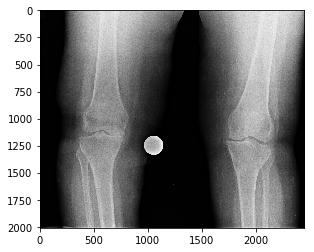

In [4]:
plt.imshow(np_img, cmap="gray")
plt.show()

In [5]:
np.eye(2).flatten().tolist()

[1.0, 0.0, 0.0, 1.0]

In [6]:
def get_scaling_transform():
    scale = max(np_img.shape[0]/256, np_img.shape[1]/256)
    print(scale)
    t = sitk.AffineTransform(2)
    t.Scale(scale)
    return t

In [7]:
def get_transform():
    t = sitk.AffineTransform(2)
    t.SetTranslation([(np_img.shape[0]-1)/2, (np_img.shape[1]-1)/2])
    #matrix = np.array(t.GetMatrix()).reshape((2,2))
    scale = max(np_img.shape[0]/256, np_img.shape[1]/256)
    #matrix[0,0] = scale
    #matrix[1,1] = scale
    t.Scale(scale)
    t.SetTranslation([-255/2, -255/2])
    return t

In [8]:
resample_filter = sitk.ResampleImageFilter()
resample_filter.SetSize([256,256])
resample_filter.SetInterpolator(sitk.sitkLinear)
resample_filter.SetOutputSpacing([1,1])
resample_filter.SetOutputOrigin([0,0])
resample_filter.SetOutputDirection(np.eye(2).flatten().tolist())
resample_filter.SetTransform(get_transform())
resample_filter.SetOutputPixelType(sitk.sitkFloat32)
resample_filter.SetOutputPixelType(img.GetPixelID())
output_image = resample_filter.Execute(img)

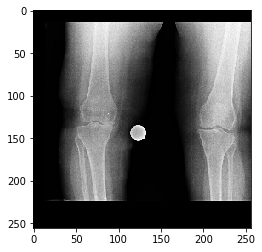

In [9]:
np_img = sitk.GetArrayFromImage(output_image)
np_img.shape, np_img.dtype
plt.imshow(np_img, cmap="gray")
plt.show()